In [8]:
import tensorflow as tf
import keras
from keras.datasets import mnist
from keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np 
import random

In [7]:
(x_train,y_train),(x_test,y_test)= mnist.load_data()
x_train = x_train/255
x_test = x_test/255

In [9]:
model = Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(120, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

/home/student/anaconda3/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025-07-31 11:12:51.011431: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [42]:
model.compile(optimizer='sgd', loss="sparse_categorical_crossentropy", metrics=['accuracy'])
H = model.fit(x_train,y_train, validation_data=(x_test,y_test), epochs = 8)



Epoch 1/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9997 - loss: 0.0037 - val_accuracy: 0.9803 - val_loss: 0.0735
Epoch 2/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9996 - loss: 0.0036 - val_accuracy: 0.9803 - val_loss: 0.0735
Epoch 3/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.9996 - loss: 0.0036 - val_accuracy: 0.9807 - val_loss: 0.0736
Epoch 4/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9997 - loss: 0.0038 - val_accuracy: 0.9808 - val_loss: 0.0736
Epoch 5/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9998 - loss: 0.0036 - val_accuracy: 0.9805 - val_loss: 0.0737
Epoch 6/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9996 - loss: 0.0036 - val_accuracy: 0.9807 - val_loss: 0.0738
Epoch 7/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9998 - loss: 0.0031 - val_accuracy: 0.9808 - val_loss: 0.0738
Epoch 8/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9998 - loss: 0.0033 - val_a

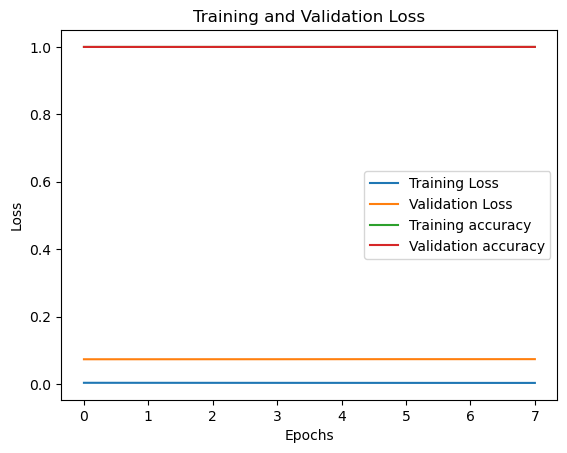

In [43]:
plt.plot(H.history['loss'], label='Training Loss')
plt.plot(H.history['val_loss'], label='Validation Loss')
plt.plot(H.history['accuracy'], label='Training accuracy')
plt.plot(H.history['accuracy'], label='Validation accuracy')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [44]:
test_loss,test_acc = model.evaluate(x_test,y_test)
print("loss: %.3f" % test_loss)
print("accuracy: %.3f"% test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9782 - loss: 0.0869
loss: 0.074
accuracy: 0.981


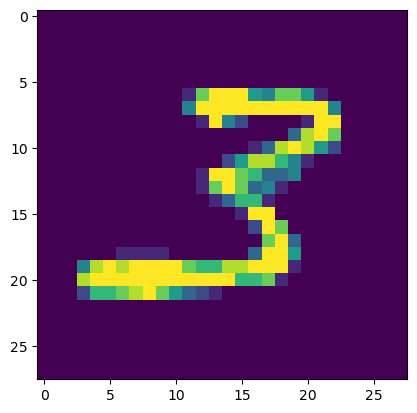

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Handwritten numbere in the image is: 3


In [46]:
n= random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()
predict= model.predict(x_test)
print("Handwritten numbere in the image is: %d" %np.argmax(predict[n]))